### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews=pd.read_csv("turtle_reviews.csv")

# View the DataFrame.
reviews

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
0     graduate       EN      Web      453   
1     graduate       EN      Web      466   
2     graduate       EN      Web      254   
3     graduate       EN      Web      263   
4     graduate       EN      Web      291   
...        ...      ...      ...      ...   
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 11 columns]

In [3]:
# Any missing values?
reviews_na = reviews[reviews.isna().any(axis=1)]
reviews_na

Empty DataFrame
Columns: [gender, age, remuneration (k£), spending_score (1-100), loyalty_points, education, language, platform, product, review, summary]
Index: []

In [4]:
# Explore the data.
print(reviews.shape)
print(reviews.dtypes)
print(reviews.head())
print(reviews.tail())

(2000, 11)
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object
   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate 

In [5]:
# Descriptive statistics.
print(reviews.describe())

               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  


## 2. Drop columns

In [6]:
reviews
# Drop unnecessary columns.
reviews.drop(columns=['language','platform'],inplace=True)

# View column names.
reviews

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education  product                                             review  \
0     graduate      453  When it comes to a DM's screen, the space on t...   
1     graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     graduate      254  Nice art, nice printing.  Why two panels are f...   
3     graduate      263  Amazing buy! Bought it as a gift for our new d...   
4     graduate      291  As my review of GF9's previous screens these w...   
...        ...      ...                                                ...   
1995       PhD      977  The perfect word game for mixed ages (with Mom...   
1996       PhD      979  Great game.  Did not think I would like it whe...   
1997  graduate     1012  Great game for all.........\nKeeps the mind ni...   
1998       PhD     1031                                          fun game!   
1999       PhD      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

## 3. Rename columns

In [7]:
# Rename the column headers.
reviews=reviews.rename(columns={"remuneration (k£)":"remuneration","spending_score (1-100)":"spending_score"})

# View column names.
reviews

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
reviews.to_csv("reviews.csv",index=False)

In [9]:
# Import new CSV file with Pandas.
pd.read_csv("reviews.csv")

# View DataFrame.
reviews

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

## 5. Linear regression

### 5a) spending vs loyalty

In [10]:
# Independent variable.
x = reviews['spending_score']

# Dependent variable.
y = reviews['loyalty_points']

# OLS model and summary.
f='y~x'
spending_loyalty_model = ols(f,data=reviews).fit()
spending_loyalty_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):          2.92e-263
Time:                        23:56:52   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Extract the estimated parameters.
print("Parameters: ",spending_loyalty_model.params)

# Extract the standard errors.
print("Standard errors: ", spending_loyalty_model.bse)  

# Extract the predicted values.
print("Predicted values: ", spending_loyalty_model.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [12]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.052663)+33.061693*x

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

(0.0, 7191.4495485)

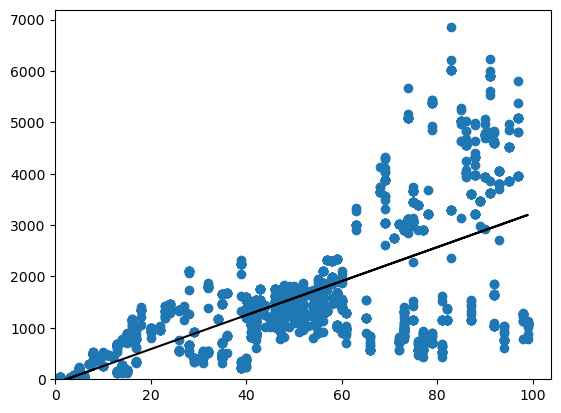

In [13]:
# Plot the graph with a regression line.
plt.scatter(x,y)
plt.plot(x,y_pred, color='black')
plt.xlim(0)
plt.ylim(0)

### 5b) renumeration vs loyalty

In [14]:
# Independent variable.
x=reviews["remuneration"]

# Dependent variable.
y=reviews["loyalty_points"]

# OLS model and summary.
f="y~x"
remuneration_loyalty_model = ols(f,data=reviews).fit()
remuneration_loyalty_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):          2.43e-209
Time:                        23:56:52   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Extract the estimated parameters.
print("Parameters: ",remuneration_loyalty_model.params)

# Extract the standard errors.
print("Standard errors: ", remuneration_loyalty_model.bse)

# Extract the predicted values.
print("Predicted values: ",remuneration_loyalty_model.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [16]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred=(-65.686513)+34.187825*x

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

(0.0, 7188.1)

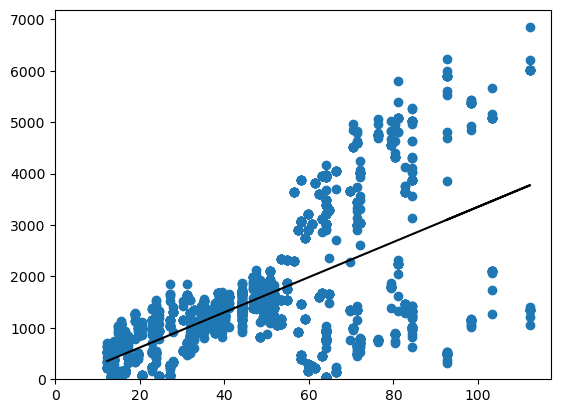

In [17]:
# Plot graph with regression line.
plt.scatter(x,y)
plt.plot(x,y_pred,color="black")
plt.xlim(0)
plt.ylim(0)

### 5c) age vs loyalty

In [18]:
# Independent variable.
x = reviews["age"]

# Dependent variable.
y = reviews["loyalty_points"]

# OLS model and summary.
f="y~x"
age_loyalty_model=ols(f,data=reviews).fit()
age_loyalty_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 20 Apr 2023   Prob (F-statistic):             0.0577
Time:                        23:56:52   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract the estimated parameters.
print("Parameters: ",age_loyalty_model.params)

# Extract the standard errors.
print("Standard errors: ",age_loyalty_model.bse)

# Extract the predicted values.
print("Predicted values: ",age_loyalty_model.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [20]:
# Set the X coefficient and the constant to generate the regression table.
y_pred=(1736.517739)-4.012805*x

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

(0.0, 7188.1)

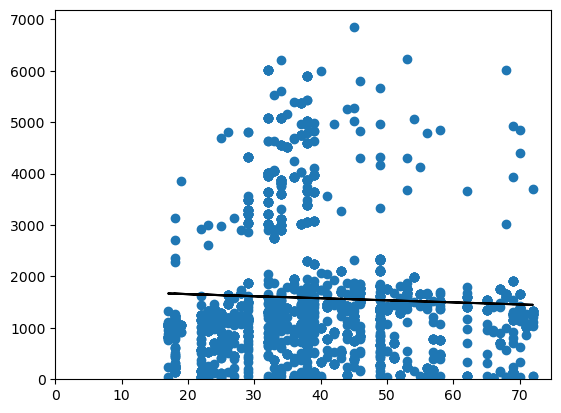

In [21]:
# Plot graph with regression line.
plt.scatter(x,y)
plt.plot(x,y_pred,color="black")
plt.xlim(0)
plt.ylim(0)

## 6. Observations and insights

***Your observations here...***






The using ordinary least square methond, we can conclude that spending score has the highest positive correlation with loyalty. We can firstly compare the R square, which indicate the percentage of variation of a dependent variable that is explained by an independent variable, spending versus loyalty scored 0.452 which is the highest among the 3 pair of dependant and independant variables. However, as the score is under 50% and showed by the visualization, the correlation is non robust. And the p-value is less than 0.05, therefore the p-value is significant and the null hypothesis should be rejected.

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [22]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [23]:
# Load the CSV file(s) as df2.
df2=pd.read_csv("reviews.csv")

# View DataFrame.
df2

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [24]:
# Drop unnecessary columns.
df2=reviews[['remuneration','spending_score']]

# View DataFrame.
df2

remuneration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]

In [25]:
# Explore the data.
print(df2.shape)
print(df2.dtypes)
print(df2.head())
print(df2.tail())

(2000, 2)
remuneration      float64
spending_score      int64
dtype: object
   remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40
      remuneration  spending_score
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8


In [26]:
# Descriptive statistics.
print(df2.describe())

       remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

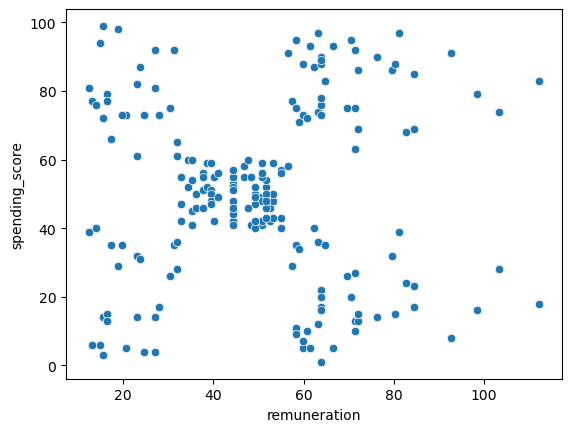

In [27]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',y='spending_score',data=df2)

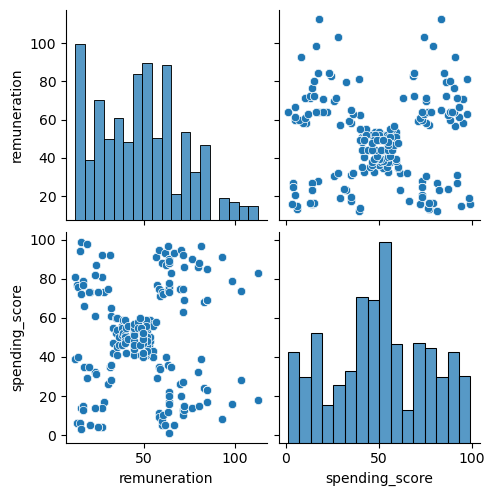

In [28]:
# Create a pairplot with Seaborn.
sns.pairplot(df2)

## 3. Elbow and silhoutte methods

<function matplotlib.pyplot.show(close=None, block=None)>

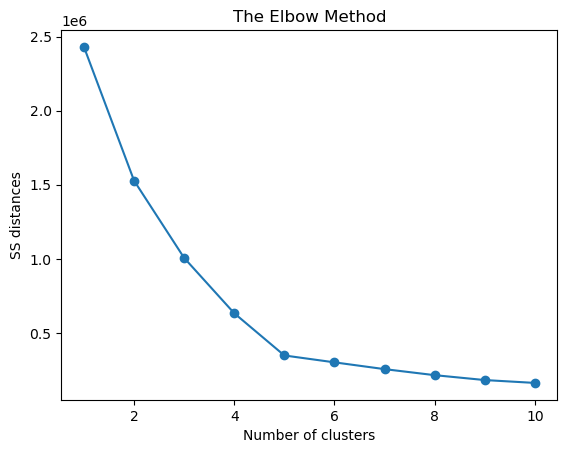

In [29]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,
                   init='k-means++',
                   max_iter=300,
                   n_init=10,
                   random_state=0)
    kmeans.fit(df2)
    ss.append(kmeans.inertia_)
    
#Plot the elbow method
plt.plot(range(1,11),
         ss,
        marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distances")
plt.show

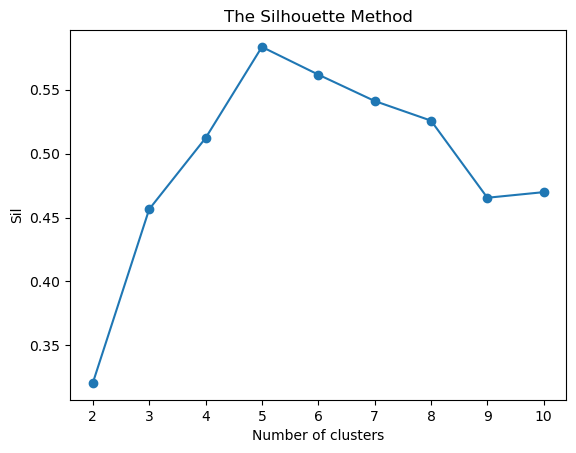

In [30]:
# Determine the number of clusters: Silhouette method.
sil=[]
kmax=10
for k in range(2, kmax+1):
    kmeans_s= KMeans(n_clusters=k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                               labels,
                               metric='euclidean'))
#Plot the silhouette method.
plt.plot(range(2, kmax+1),
        sil,
        marker='o')

#Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")
plt.show()

## 4. Evaluate k-means model at different values of *k*

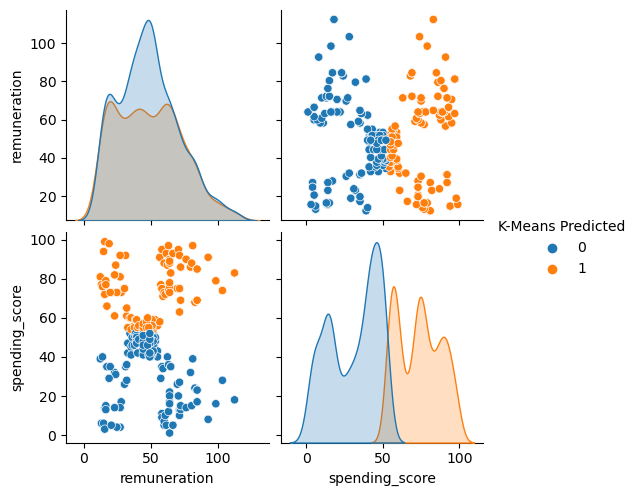

In [31]:
kmeans = KMeans(n_clusters = 2,
               max_iter = 20000,
               init='k-means++',
               random_state=0).fit(df2)
clusters = kmeans.labels_
df2['K-Means Predicted']=clusters
# Plot the predicted.
sns.pairplot(df2,
            hue='K-Means Predicted',
            diag_kind='kde')

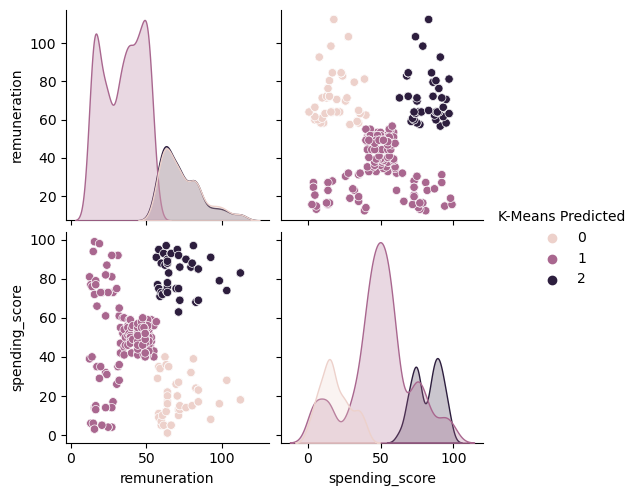

In [32]:
kmeans = KMeans(n_clusters = 3,
               max_iter = 20000,
               init='k-means++',
               random_state=0).fit(df2)
clusters = kmeans.labels_
df2['K-Means Predicted']=clusters
# Plot the predicted.
sns.pairplot(df2,
            hue='K-Means Predicted',
            diag_kind='kde')

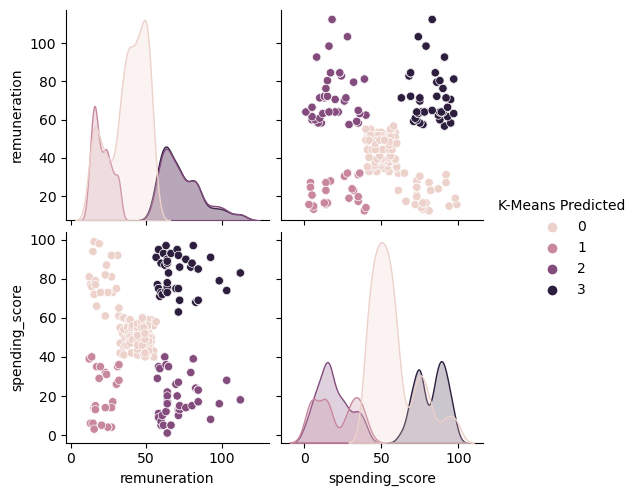

In [33]:
kmeans = KMeans(n_clusters = 4,
               max_iter = 20000,
               init='k-means++',
               random_state=0).fit(df2)
clusters = kmeans.labels_
df2['K-Means Predicted']=clusters
# Plot the predicted.
sns.pairplot(df2,
            hue='K-Means Predicted',
            diag_kind='kde')

## 5. Fit final model and justify your choice

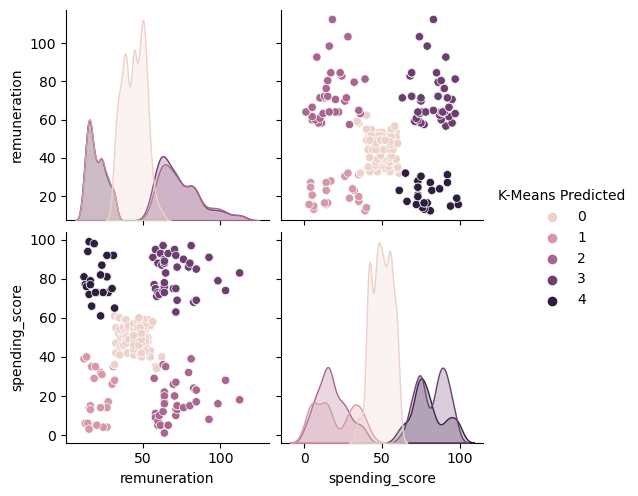

In [34]:
# Apply the final model.
kmeans = KMeans(n_clusters = 5,
               max_iter = 20000,
               init='k-means++',
               random_state=0).fit(df2)
clusters = kmeans.labels_
df2['K-Means Predicted']=clusters
# Plot the predicted.
sns.pairplot(df2,
            hue='K-Means Predicted',
            diag_kind='kde')

In [35]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1
      remuneration  spending_score  K-Means Predicted
1995         84.46              69                  3
1996         92.66               8                  2
1997         92.66              91                  3
1998         98.40              16                  2
1999         92.66               8                  2


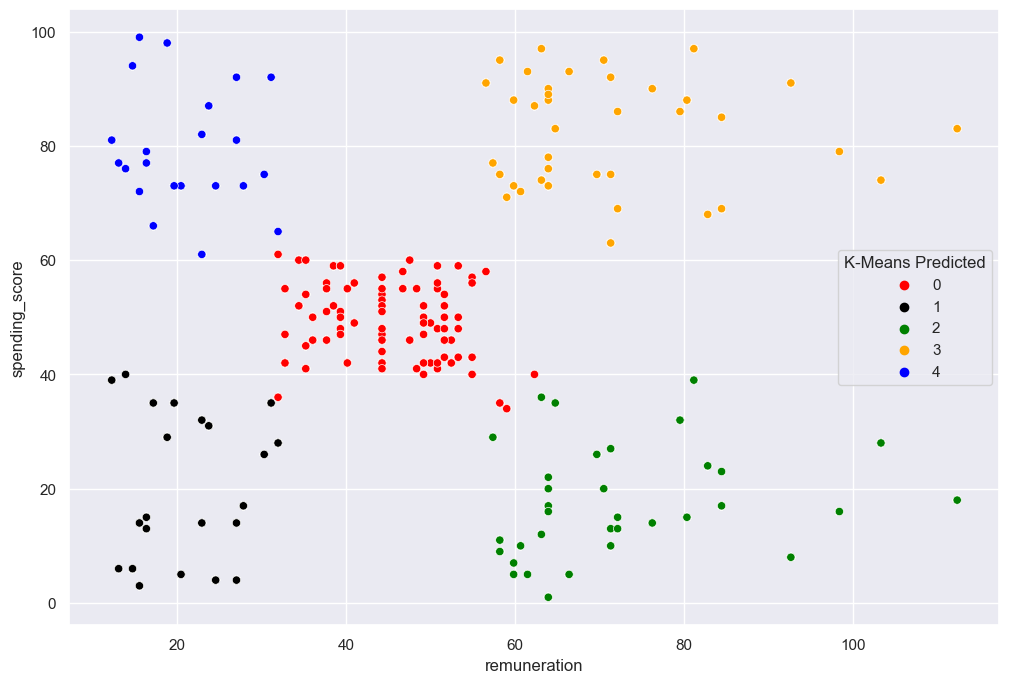

In [36]:
# Visualising the clusters.
sns.set(rc={'figure.figsize':(12,8)})

sns.scatterplot(x='remuneration',
                y='spending_score',
                data = df2,
                hue='K-Means Predicted',
                palette=['red','black','green','orange','blue'])

# View the DataFrame.
print(df2.head())
print(df2.tail())

## 7. Discuss: Insights and observations

***Your observations here...***

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [37]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to C:\Users\Sin Chun
[nltk_data]     Chiu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sin Chun
[nltk_data]     Chiu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# Load the data set as df3.
df3=reviews

# View DataFrame.
df3

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [39]:
# Explore data set.
print(df3.shape)
print(df3.dtypes)
print(df3.head())
print(df3.tail())
print(df3.describe())

(2000, 9)
gender             object
age                 int64
remuneration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object
   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as

In [40]:
# Keep necessary columns. Drop unnecessary columns.
df3=reviews[['review','summary']]

# View DataFrame.
print(df3.shape)
print(df3)

(2000, 2)
                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five

In [41]:
# Determine if there are any missing values.
df3_na = df3[df3.isna().any(axis=1)]
df3_na

Empty DataFrame
Columns: [review, summary]
Index: []

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [42]:
# Review: Change all to lower case and join with a space.
df3['review']=df3['review'].str.lower()
review=' '.join(df3['review'].tolist())
print(review)
len(review)

when it comes to a dm's screen, the space on the screen itself is at an absolute premium. the fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. the only reason that i gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. other than that, it drops the ball completely. an open letter to galeforce9*:

your unpainted miniatures are very not bad. your spell cards are great. your board games are "meh". your dm screens, however, are freaking terrible. i'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. once again, you've created a single use screen that is only useful when running the "storm king's thunder" adventure. even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. i massive swath of the inner panel is wasted on artwork a

610030

In [43]:
# Summary: Change all to lower case and join with a space.
df3['summary']=df3['summary'].str.lower()
summary=' '.join(df3['summary'].tolist())
print(summary)
len(summary)

the fact that 50% of this space is wasted on art (and not terribly informative or needed art ... another worthless dungeon master's screen from galeforce9 pretty, but also pretty useless five stars money trap five stars best gm screen ever five stars great but could be even better another missed opportunity.  not a value add to the product line. five stars love the map! not a general dm screen very weak game fell completely flat... five stars good book buckley was a card mommer very advanced, but as good as it gets you better know what you're getting into don't bother the worst value i've ever seen not enough product good product but... temporary tattoos were good gift. huge hit gorgeous pictures! five stars wonderful designs. wow, great coloring book!!!!!! nice book great pictures perfect! well done.... my relaxation beautiful coloring book the pictures are great, i've done one and gave it to a ... great buy! can't wait to work on this book stained glass perfection! four stars so beau

52591

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [44]:
# Replace all the punctuations in review column.
import re
df3['review'] =df3['review'].apply(lambda x: re.sub(r"[\.\?\!\,\:\;\"]", '', x))
# View output.
print(df3['review'])

0       when it comes to a dm's screen the space on th...
1       an open letter to galeforce9*\n\nyour unpainte...
2       nice art nice printing  why two panels are fil...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9's previous screens these w...
                              ...                        
1995    the perfect word game for mixed ages (with mom...
1996    great game  did not think i would like it when...
1997            great game for all\nkeeps the mind nimble
1998                                             fun game
1999    this game is fun a lot like scrabble without a...
Name: review, Length: 2000, dtype: object


In [45]:
# Replace all the puncuations in summary column.
df3['summary'] =df3['summary'].apply(lambda x: re.sub(r"[\.\?\!\,\:\;\"]", '', x))

# View output.
print(df3['summary'])

0       the fact that 50% of this space is wasted on a...
1       another worthless dungeon master's screen from...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995       the perfect word game for mixed ages (with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object


### 2c) Drop duplicates in both columns

In [46]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['review','summary'])

# View DataFrame.
print(df3.shape)
print(df3)

(1962, 2)
                                                 review  \
0     when it comes to a dm's screen the space on th...   
1     an open letter to galeforce9*\n\nyour unpainte...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9's previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages (with mom...   
1996  great game  did not think i would like it when...   
1997          great game for all\nkeeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50% of this space is wasted on a...  
1     another worthless dungeon master's screen from...  
2                        pretty but also pretty useless  
3                                            five

## 3. Tokenise and create wordclouds

In [47]:
# Create new DataFrame (copy DataFrame).
df3t=df3.copy()

# View DataFrame.
print(df3t.shape)
print(df3t)

(1962, 2)
                                                 review  \
0     when it comes to a dm's screen the space on th...   
1     an open letter to galeforce9*\n\nyour unpainte...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9's previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages (with mom...   
1996  great game  did not think i would like it when...   
1997          great game for all\nkeeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50% of this space is wasted on a...  
1     another worthless dungeon master's screen from...  
2                        pretty but also pretty useless  
3                                            five

In [48]:
# Apply tokenisation to both columns.
df3t['review'] = df3t['review'].apply(lambda x: word_tokenize(x))
df3t['summary'] = df3t['summary'].apply(lambda x: word_tokenize(x))
# View DataFrame.
df3t

review  \
0     [when, it, comes, to, a, dm, 's, screen, the, ...   
1     [an, open, letter, to, galeforce9, *, your, un...   
2     [nice, art, nice, printing, why, two, panels, ...   
3     [amazing, buy, bought, it, as, a, gift, for, o...   
4     [as, my, review, of, gf9, 's, previous, screen...   
...                                                 ...   
1995  [the, perfect, word, game, for, mixed, ages, (...   
1996  [great, game, did, not, think, i, would, like,...   
1997  [great, game, for, all, keeps, the, mind, nimble]   
1998                                        [fun, game]   
1999  [this, game, is, fun, a, lot, like, scrabble, ...   

                                                summary  
0     [the, fact, that, 50, %, of, this, space, is, ...  
1     [another, worthless, dungeon, master, 's, scre...  
2                  [pretty, but, also, pretty, useless]  
3                                         [five, stars]  
4                                         [money, trap]  
...                                                 ...  
1995  [the, perfect, word, game, for, mixed, ages, (...  
1996                                       [super, fun]  
1997                                      [great, game]  
1998                                      [four, stars]  
1999                                 [love, this, game]  

[1962 rows x 2 columns]

In [49]:
# Review: Create a word cloud.
review_cloud = WordCloud(background_color='white').generate(review)

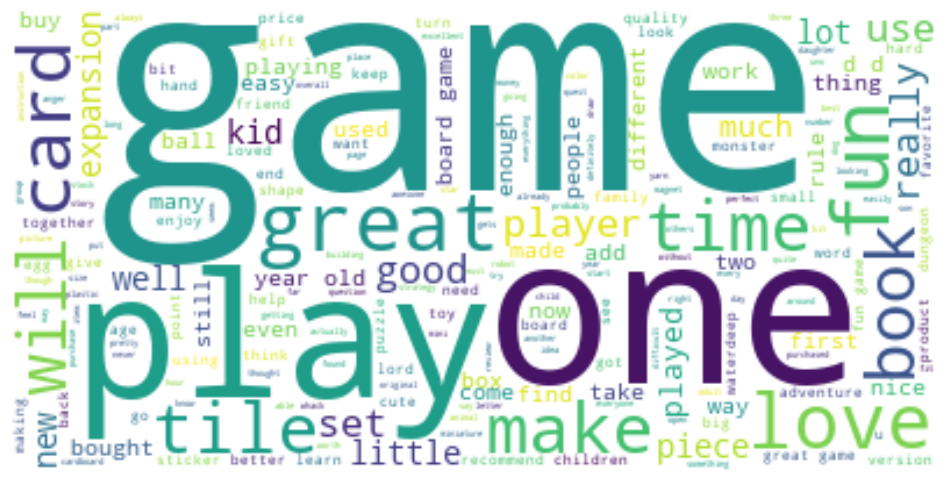

In [50]:
# Review: Plot the WordCloud image.
plt.imshow(review_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
# Summary: Create a word cloud.
summary_cloud = WordCloud(background_color='white').generate(summary)

<function matplotlib.pyplot.show(close=None, block=None)>

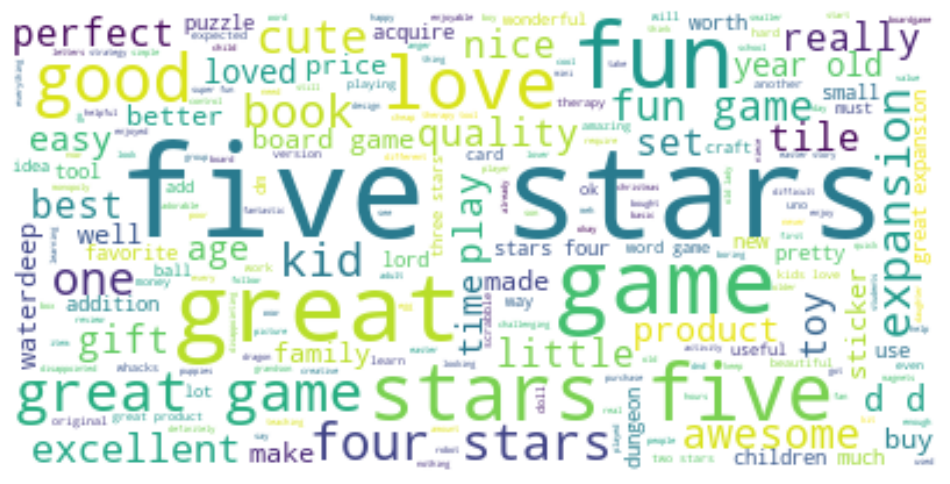

In [52]:
# Summary: Plot the WordCloud image.
plt.imshow(summary_cloud, interpolation='bilinear')
plt.axis('off')
plt.show

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [53]:
# Determine the frequency distribution.
review=' '.join(df3['review'].tolist())
summary=' '.join(df3['summary'].tolist())

In [54]:
review_t =word_tokenize(review)
review_fd=FreqDist(review_t)
print(review_fd.most_common(15))

[('the', 5453), ('and', 3234), ('a', 3167), ('to', 3162), ('of', 2489), ('it', 2480), ('i', 2337), ('is', 1832), ('this', 1776), ('game', 1676), ('for', 1545), ('you', 1313), ('with', 1265), ('in', 1148), ('that', 1107)]


In [55]:
summary_t =word_tokenize(summary)
summary_fd=FreqDist(summary_t)
print(summary_fd.most_common(15))

[('stars', 428), ('five', 343), ('game', 318), ('great', 293), ('the', 261), ('a', 239), ('for', 232), ('fun', 217), ('to', 192), ('it', 183), ('and', 168), ('of', 139), ('this', 135), ('is', 104), ('i', 96)]


### 4b) Remove alphanumeric characters and stopwords

In [56]:
# Delete all the alpanum.
review=re.sub(r'\W+',' ',review)
print(review)

when it comes to a dm s screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible i m still waiting for a single screen that isn t polluted with pointless artwork where useful reference able tables should be once again you ve created a single use screen that is only useful when running the storm king s thunder adventure even despite the fact that it s geared to that adventure path it s usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which

In [57]:
summary=re.sub(r'\W+',' ',summary)
print(summary)

the fact that 50 of this space is wasted on art and not terribly informative or needed art another worthless dungeon master s screen from galeforce9 pretty but also pretty useless five stars money trap five stars best gm screen ever five stars great but could be even better another missed opportunity not a value add to the product line five stars love the map not a general dm screen very weak game fell completely flat five stars good book buckley was a card mommer very advanced but as good as it gets you better know what you re getting into don t bother the worst value i ve ever seen not enough product good product but temporary tattoos were good gift huge hit gorgeous pictures five stars wonderful designs wow great coloring book nice book great pictures perfect well done my relaxation beautiful coloring book the pictures are great i ve done one and gave it to a great buy can t wait to work on this book stained glass perfection four stars so beautiful great pictures very nice five star

In [58]:
# Remove all the stopwords
review_t =word_tokenize(review)

stop_words = set(stopwords.words('english'))

review_st=[]
for i in review_t:
    if i not in stop_words:
        review_st.append(i)

review = ' '.join(review_st)
print(review)

comes dm screen space screen absolute premium fact 50 space wasted art terribly informative needed art well makes completely useless reason gave 2 stars 1 technically speaking least still stand block notes dice rolls drops ball completely open letter galeforce9 unpainted miniatures bad spell cards great board games meh dm screens however freaking terrible still waiting single screen polluted pointless artwork useful reference able tables created single use screen useful running storm king thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted artwork bloated overland map could easily reduced single panel size table nigh useless short stop making crap dm screens nice art nice printing two panels filled general forgotten realms map beyond one blue ocean waste understand make dm screens useful kinds adventures rather solely specific adventure supposed able transpose adventure lands outside forgotten realms even list new monste

In [59]:
summary_t = word_tokenize(summary)

summary_st=[]
for i in summary_t:
    if i not in stop_words:
        summary_st.append(i)
        
summary = ' '.join(summary_st)
print(summary)

fact 50 space wasted art terribly informative needed art another worthless dungeon master screen galeforce9 pretty also pretty useless five stars money trap five stars best gm screen ever five stars great could even better another missed opportunity value add product line five stars love map general dm screen weak game fell completely flat five stars good book buckley card mommer advanced good gets better know getting bother worst value ever seen enough product good product temporary tattoos good gift huge hit gorgeous pictures five stars wonderful designs wow great coloring book nice book great pictures perfect well done relaxation beautiful coloring book pictures great done one gave great buy wait work book stained glass perfection four stars beautiful great pictures nice five stars five stars five stars five stars five stars five stars four stars three stars like every image contained stained glass coloring book creative stained glass pictures nice pictures great transaction drawing

### 4c) Create wordcloud without stopwords

In [60]:
# Create a wordcloud without stop words.
review_cloud = WordCloud(background_color='white').generate(review)

In [61]:
summary_cloud = WordCloud(background_color='white').generate(summary)

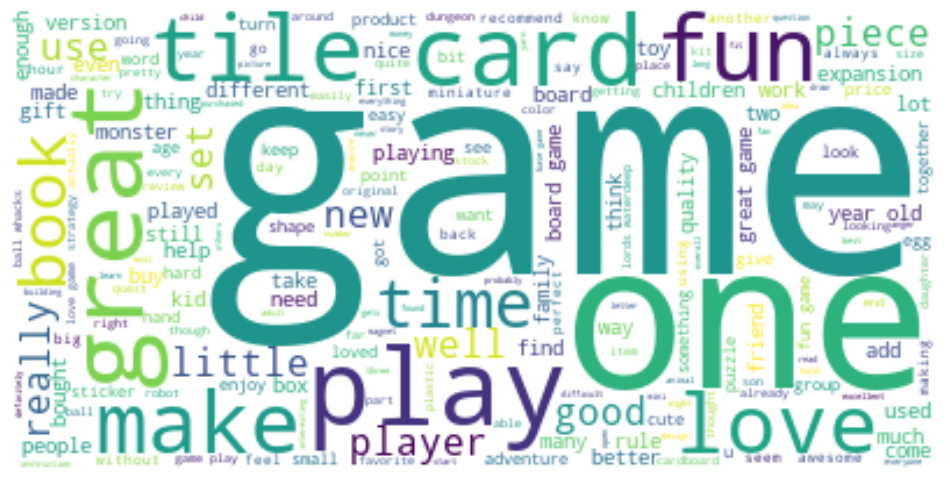

In [62]:
# Plot the wordcloud image.
plt.imshow(review_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

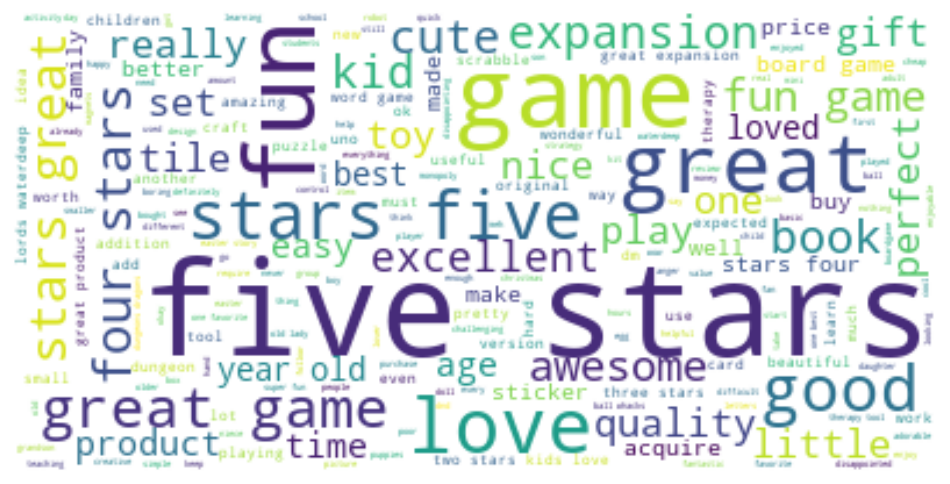

In [63]:
plt.imshow(summary_cloud, interpolation='bilinear')
plt.axis('off')
plt.show

### 4d) Identify 15 most common words and polarity

In [75]:
# Determine the 15 most common words.
review_t =word_tokenize(review)
review_fd=FreqDist(review_t)
print(review_fd.most_common(15))

[('game', 1689), ('great', 581), ('fun', 554), ('one', 540), ('play', 506), ('like', 421), ('love', 324), ('really', 319), ('get', 319), ('cards', 306), ('tiles', 300), ('time', 296), ('good', 291), ('would', 282), ('book', 274)]


In [65]:
summary_t =word_tokenize(summary)
summary_fd=FreqDist(summary_t)
print(summary_fd.most_common(15))

[('stars', 428), ('five', 343), ('game', 319), ('great', 295), ('fun', 218), ('love', 93), ('good', 93), ('four', 58), ('like', 54), ('expansion', 53), ('kids', 50), ('cute', 45), ('book', 43), ('one', 38), ('old', 37)]


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [66]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [102]:
# Determine polarity of both columns.
# Review
df3['review_polarity']=df3['review'].apply(generate_polarity)
# View output.
df3['review_polarity']

0      -0.036111
1       0.035952
2       0.116640
3       0.578788
4      -0.316667
          ...   
1995    0.216071
1996    0.158333
1997    0.200000
1998   -0.050000
1999   -0.095833
Name: review_polarity, Length: 1962, dtype: float64

In [103]:
# Determine polarity of both columns.
# Summary
df3['summary_polarity']=df3['summary'].apply(generate_polarity)
# View output.
df3['summary_polarity']

0       0.150000
1      -0.800000
2       0.000000
3       0.000000
4       0.000000
          ...   
1995    0.200000
1996    0.316667
1997    0.200000
1998    0.000000
1999    0.050000
Name: summary_polarity, Length: 1962, dtype: float64

In [90]:
!pip install vaderSentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

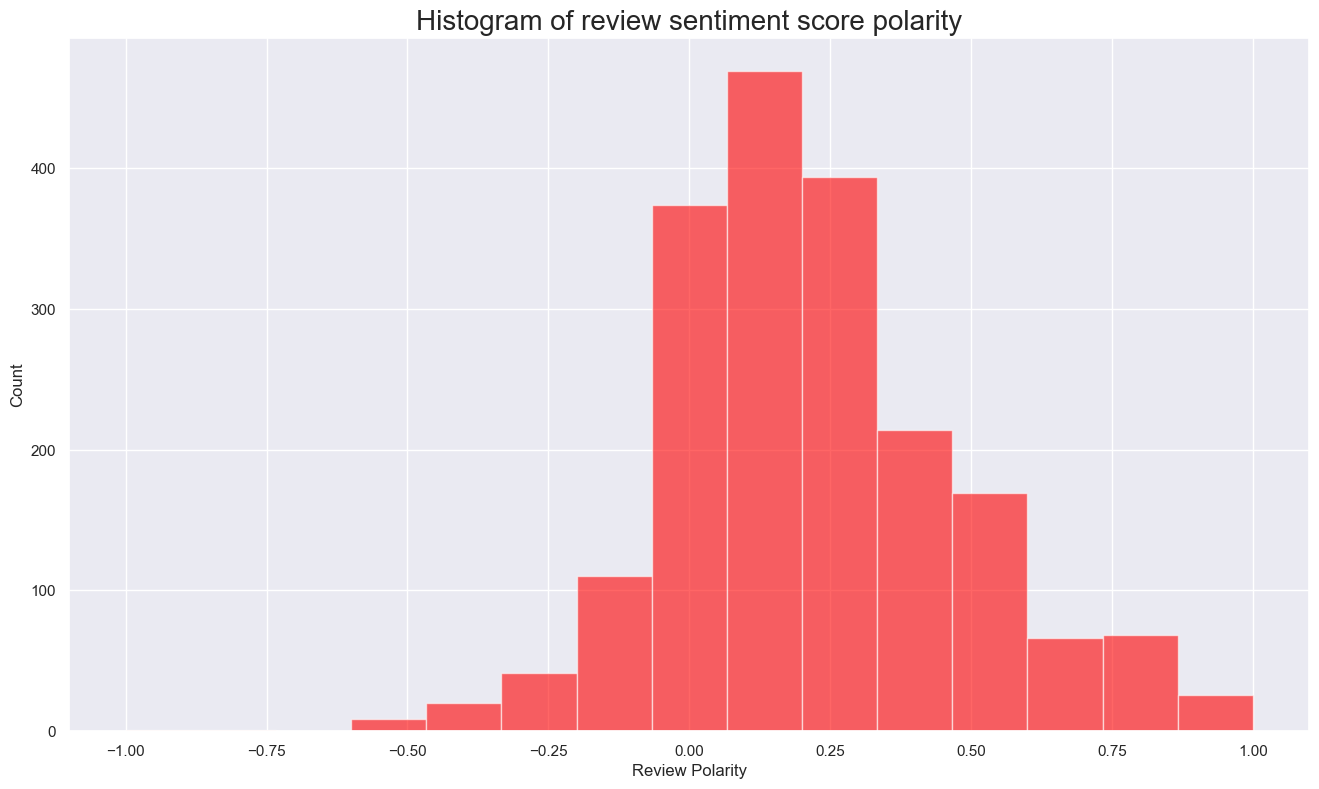

In [104]:
# Review: Create a histogram plot with bins = 15.
# Histogram of review polarity
num_bins = 15

plt.figure(figsize = (16,9))

n, bins, patches = plt.hist(df3['review_polarity'],num_bins, facecolor='red', alpha=0.6)

plt.xlabel('Review Polarity',fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of review sentiment score polarity', fontsize=20)

# Histogram of sentiment score
plt.show()

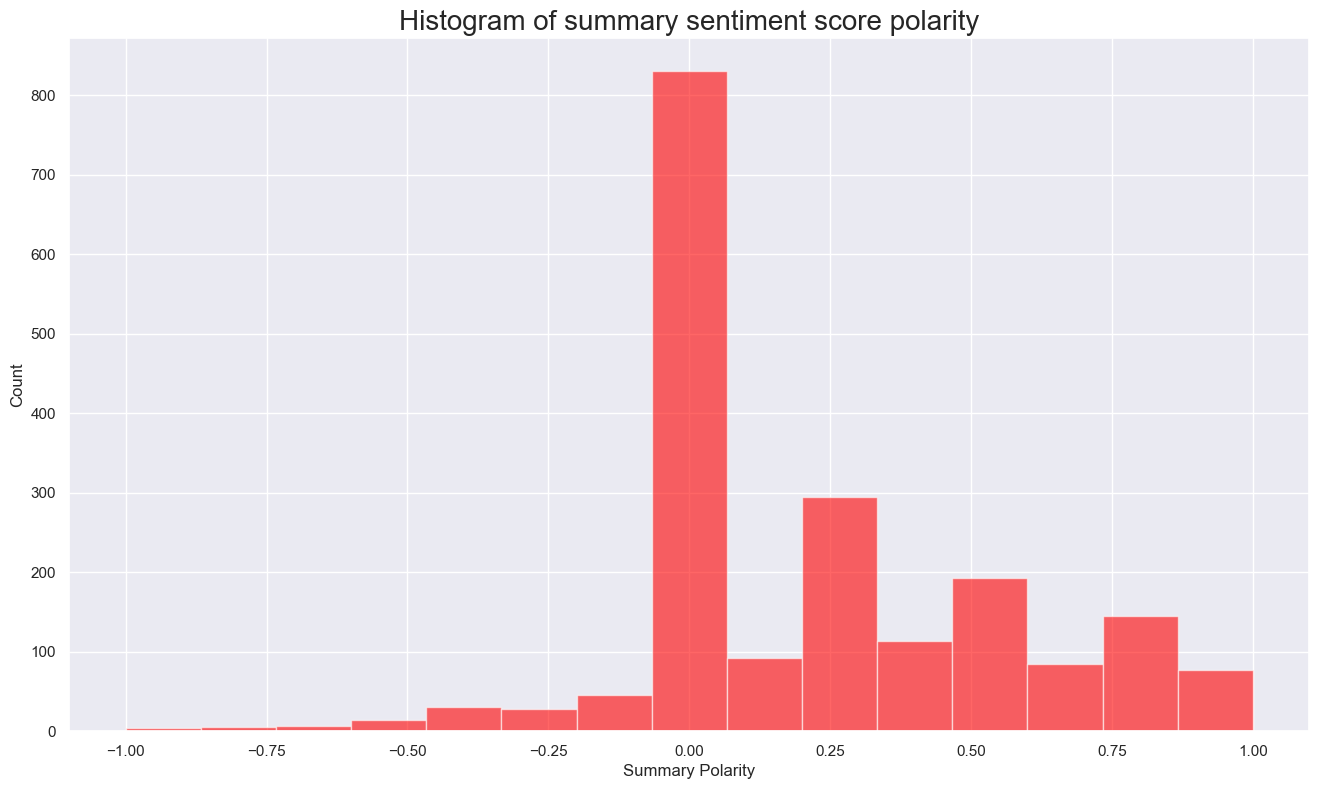

In [105]:
# Review: Create a histogram plot with bins = 15.
# Histogram of summary polarity
num_bins = 15

plt.figure(figsize = (16,9))

n, bins, patches = plt.hist(df3['summary_polarity'],num_bins, facecolor='red', alpha=0.6)

plt.xlabel('Summary Polarity',fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of summary sentiment score polarity', fontsize=20)

# Histogram of sentiment score
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [108]:
# Top 20 review negative reviews.
review_negative_sentiment = df3.nsmallest(20,'review_polarity')

# View output.
review_negative_sentiment = review_negative_sentiment[['review','review_polarity']]
review_negative_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

In [110]:
# Top 20 summary negative summaries.
summary_negative_sentiment = df3.nsmallest(20,'summary_polarity')

# View output.
summary_negative_sentiment = summary_negative_sentiment[['summary','summary_polarity']]
summary_negative_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

In [109]:
# Top 20 review positive reviews.
review_positive_sentiment = df3.nlargest(20,'review_polarity')

# View output.
review_positive_sentiment = review_positive_sentiment[['review','review_polarity']]
review_positive_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

In [111]:
# Top 20 summary positive summaries.
summary_positive_sentiment = df3.nlargest(20,'summary_polarity')

# View output.
summary_positive_sentiment = summary_positive_sentiment[['summary','summary_polarity']]
summary_positive_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

## 7. Discuss: Insights and observations

***Your observations here...***

# 